##### Teorema del límite central

Material en construcción, Edgar Rueda, febrero 2021

**Conocimientos previos recomendados**
- Concepto variable aleatoria continua y discreta.
- El concepto de distribución.
- El concepto de media o promedio, varianza, y desviación estándar.
- Conceptos de límite
- Concepto de función densidad de probabilidad.

**Bibliografía**
- Lyons, L., & Louis, L. (1991). A practical guide to data analysis for physical science students. Cambridge University Press.

- Hughes, I., & Hase, T. (2010). Measurements and their uncertainties: a practical guide to modern error analysis. Oxford University Press.

- Squires, G. L., & Squires, G. L. (2001). Practical physics. Cambridge university press.

##1. Definición
Si tomamos un conjunto  $\big\{x_1,x_2,..,x_n\big\}$ con $n$ variables aleatorias independientes que fueron obtenidas de una distribución (no necesariamente gaussiana) con media $\mu$ y desviación estándar $\sigma$, el promedio de estas variables será $\frac{1}{n}(x_1 + x_2 + ... + x_n)$. El teorema nos dice que si repetimos este procedimiento muchas veces, para valores grandes de $n$ la distribución formada por los promedios tenderá a una distribución gaussiana con media $\mu$, y desviación estándar $\frac{\sigma}{\sqrt n}$.

Este resultado es notable porque significa que sin importar el tipo de distribución original que tengamos, la distribución que se forma a partir del promedio de un conjunto de variables de la distribución siempre será gaussiana, y más notable aún, su desviación estándar será menor a medida que se hace más grande el conjunto.

**Pregunta**: ¿Puedes intuír el potencial que esto tiene en términos de la determinación de la incertidumbre en una medida?

##2. Ejemplo
Miremos un ejemplo para entender mejor lo que está pasando. A continuación abriremos una imagen correspondiente a un patrón de speckle generado con un haz láser y un vidrio esmerilado. La imagen está en escala de grises de 256 niveles.

Mounted at /content/gdrive


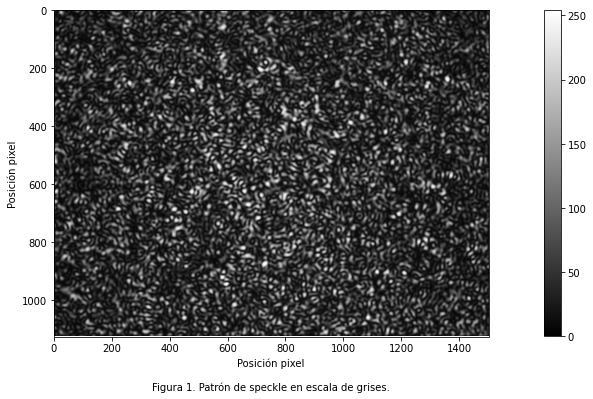

In [ ]:
#@title Código: Importar imagen, y librerías
#Importar imagen
#############
# Código de Google Colaboratory para subir el archivo WAV y trabajar con él
from google.colab import drive 
drive.mount('/content/gdrive')

!cp '/content/gdrive/My Drive/Colab Notebooks/speckle.png' 'speckle.png'

#!cp '/content/gdrive/My Drive/Colab Notebooks/speckle.png' 'speckle.png'
#############

#Librerías
from imageio import imread
import pylab as plt
import numpy as np
from scipy.stats import norm

###
Ima = imread('speckle.png')
Ima = Ima[:,:,0] # la imagen importada tenía 4 "canales" pero solo nos interesa uno
x,y = np.shape(Ima)
Ima = np.resize(Ima,(int(x/1),int(y/1)))
plt.rcParams['figure.figsize'] = 20, 6 # para modificar el tamaño de la figura
plt.figure(1)
plt.imshow(Ima, cmap='gray')
plt.ylabel('Posición pixel')
plt.xlabel('''Posición pixel

Figura 1. Patrón de speckle en escala de grises.''')
plt.colorbar()
plt.show()

En la figura 1 podemos observar el patrón de speckle. Dicho patrón se espera que tenga una distribución aleatoria de intensidades. No obstante, no podemos usar directamente la imagen porque cada speckle (que es lo consideramos variable aleatoria) está formado por una gran cantidad de pixeles que dan cuenta de variaciones suaves de intensidad entre los speckles. Esto lo podemos observar en la figura 2 cuando graficamos 100 pixeles continuos.

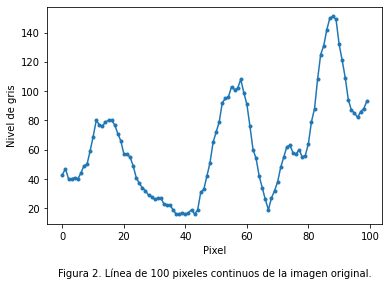

In [ ]:
#@title Código: gráfica
Ima = np.reshape(Ima,(np.size(Ima),1))
Ima2 = Ima[5000::,0]

plt.figure()
plt.plot(Ima2[0:100],'.-')
plt.ylabel('Nivel de gris')
plt.xlabel('''Pixel

Figura 2. Línea de 100 pixeles continuos de la imagen original.''')
plt.show()

Tomaremos 20 pixeles para formar el nuevo speckle, como se observa en la figura 3. Nota: estrictamente estamos haciendo cortes de los speckles.

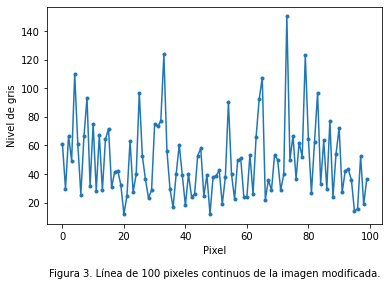

In [ ]:
#@title Código: gráfica
n = 20

ImaX2 = []
for ii in range(int(len(Ima2)/n)):
  prome = np.sum(Ima2[int(ii*n+1):int((ii+1)*n+1)])/n
  ImaX2.append(prome)

plt.figure()
plt.plot(ImaX2[0:100],'.-')
plt.ylabel('Nivel de gris')
plt.xlabel('''Pixel

Figura 3. Línea de 100 pixeles continuos de la imagen modificada.''')
plt.show()

La figura 3 ya nos asegura que podemos tomar cada pixel como una variable aleatoria. En la figura 4 graficamos la distribución correspondiente. Aquí podemos elegir entre la distribución formada por los speckles o una distribución uniforme simulada.

El promedio es 52.2
La desviación estándar es 28.5


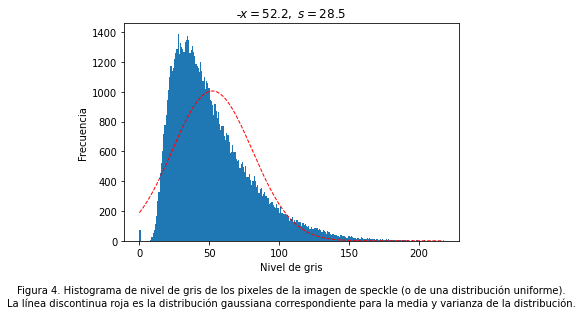

In [ ]:
#@title Código: gráfica distribución
#@markdown caso: tipo de distribución
caso = 'Speckle' #@param ['Speckle','Uniforme']

if(caso=='Speckle'): ImaX = ImaX2
else: ImaX = np.random.uniform(0,256,5000)

mediaS = np.mean(ImaX) # Comando directo de python
devstdS = np.std(ImaX)

print('El promedio es %.1f' % mediaS)
print('La desviación estándar es %.1f' %devstdS)

fig, ax = plt.subplots()
freqs,bins,patches = ax.hist(ImaX,bins=256)
y = norm.pdf( bins, mediaS, devstdS)
ax.plot(bins, y*np.size(ImaX)*abs(bins[0]-bins[1]), 'r--', linewidth=1,label='Distribución gaussiana')
ax.set_title(r'$ \bar x=%.1f,\ s=%.1f$'%(mediaS,devstdS))
ax.set_ylabel('Frecuencia')
ax.set_xlabel('''Nivel de gris

Figura 4. Histograma de nivel de gris de los pixeles de la imagen de speckle (o de una distribución uniforme).
La línea discontinua roja es la distribución gaussiana correspondiente para la media y varianza de la distribución.''')
fig.show()

De la gráfica del histograma (figura 4) claramente podemos deducir que no corresponde a una distribución gaussiana.

Ahora vamos a tomar grupos de datos de la distribución, determinamos su promedio, y construímos una nueva distribución. Luego calculamos la media y desviación estándar de la nueva distribución y la comparamos con la media de la distribución original, y la desviación estándar dada por la expresión:

$$s = \frac{\sigma}{\sqrt n} \quad (1)$$

Promedio de la distribucion = 52.2
Desviación estándar de la distribución = 4.7
Desviación estándar ec. 1 = 2.9
Tamaño de la muestra = 843


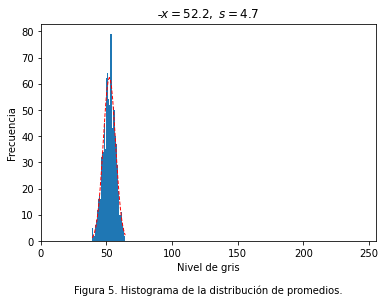

In [ ]:
#@title Código: nueva distribución
#@markdown nn:tamaño de la muestra
nn= "100" #@param [3,5,10,30,50,100]

n = float(nn)
bN = int(np.sqrt(len(ImaX)/n))

newDist = []
for ii in range(int(len(ImaX)/n)):
  prome = np.sum(ImaX[int(ii*n+1):int((ii+1)*n+1)])/n
  newDist.append(prome)

mediaP = np.mean(newDist) # Comando directo de python
devstdP = np.std(newDist)
devstdCalc = devstdS/np.sqrt(n)

print('Promedio de la distribucion = %.1f' % mediaP)
print('Desviación estándar de la distribución = %.1f' %devstdP)
print('Desviación estándar ec. 1 = %.1f'%devstdCalc)
print('Tamaño de la muestra = %d'%(int(len(ImaX)/n)))

fig, ax = plt.subplots()
freqP,binsP,patches = ax.hist(newDist,bins=bN)
y = norm.pdf( binsP, mediaP, devstdP)
ax.plot(binsP, y*np.size(newDist)*abs(binsP[0]-binsP[1]), 'r--', linewidth=1,label='Distribución gaussiana')
ax.set_title(r'$ \bar x=%.1f,\ s=%.1f$'%(mediaP,devstdP))
ax.set_xlim(0,255)
ax.set_ylabel('Frecuencia')
ax.set_xlabel('''Nivel de gris

Figura 5. Histograma de la distribución de promedios.''')
fig.show()

De la figura 5 es claro concluir que la distribución de los promedios tiende a una distribución gaussiana a medida que el tamaño de $n$ aumenta. Esto ocurre muy rápido con la distribución uniforme simulada, y más lentamente con el patrón de speckle. Por otro lado, con la distribución uniforme la ec. 1 se cumple rápidamente, mientras que con el speckle la predicción de la ecuación 1 no se logra, probablemente por que nuestros datos experimentales por razones que aquí no analizaremos no son del todo aleatorios. No obstante, en todos los casos es claro que a mayor $n$ más pequeña se hace la desviación.

##3. ¿Y cómo aplica al error experimental?
Dado que en un experimento normalmente lo que nos interesa es encontrar el valor promedio (variable experimental), el teorema nos dice que entre más midamos más exacto será nuestra predicción del valor de la variable experimental.

Más sorprendente aún es que si $n$ es grande solo tendremos que hacer un experimento, y podemos esperar que tanto la media como la desviación estándar dada por la ec. 1 (que llamaremos error estándar) se corresponda con los de la distribución de promedios. Por ejemplo, miremos el caso de medir una vez diez datos de la distribución:

In [ ]:
#@title Código:
unExp = ImaX[0:10]
munExp = np.mean(unExp)
stdExp = np.std(unExp)/np.sqrt(10)

print('Un experimento de %d datos:'%(10))
print('Valor experimental = %.1f'%munExp)
print('Error experimental = %.1f'%stdExp)

Un experimento de 10 datos:
Valor experimental = 59.4
Error experimental = 8.2


El resultado es sorprendente, es básicamente el mismo de la distribución.